In [10]:
from sklearn.datasets import load_boston
from sklearn import linear_model

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
boston = pd.read_csv('datasets/boston.csv')
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MDEV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [3]:
X = boston.drop('MDEV', axis=1).values
y = boston['MDEV'].values

In [4]:
# slice out the RM (room) column
X_rooms = X[:,5]

# Still numpy arrays
type(X_rooms), type(y)

(numpy.ndarray, numpy.ndarray)

In [5]:
X_rooms.shape, y.shape

((506,), (506,))

In [6]:
X_rooms.reshape(-1, 1).shape, y.reshape(-1, 1).shape

((506, 1), (506, 1))

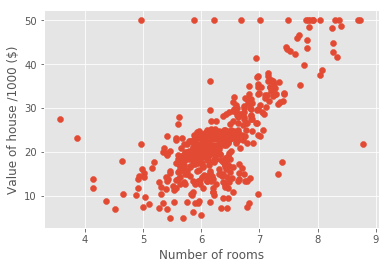

In [8]:
# keep the first dimension and add another dimension of size=1 
y = y.reshape(-1, 1)
X_rooms = X_rooms.reshape(-1, 1)

plt.style.use('ggplot')

plt.scatter(X_rooms, y)
plt.ylabel('Value of house /1000 ($)')
plt.xlabel('Number of rooms')
plt.show();

In [11]:
reg = linear_model.LinearRegression()
reg.fit(X_rooms, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [15]:
prediction_space = np.linspace(min(X_rooms), max(X_rooms)).reshape(-1, 1)
prediction_space[:10]

array([[3.561     ],
       [3.6675102 ],
       [3.77402041],
       [3.88053061],
       [3.98704082],
       [4.09355102],
       [4.20006122],
       [4.30657143],
       [4.41308163],
       [4.51959184]])

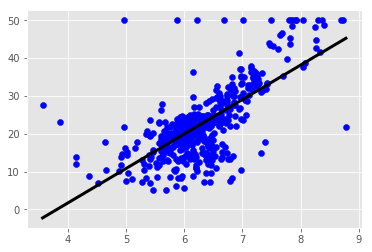

In [22]:
plt.scatter(X_rooms, y, color='blue')
plt.plot(prediction_space, reg.predict(prediction_space), 
         color='black', linewidth=3)
plt.show();